In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False
sns.set_style("whitegrid")

In [3]:
df=pd.read_csv("./../data/Superstore Data.csv", encoding="utf-8") 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
# 모든 칼럼을 보이게 만들어준다.
pd.set_option("display.max_columns", None)

In [6]:
df_copy=df.copy()
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. 데이터 둘러보기.

### 칼럼 설명

* Row ID : 일련 번호
* Order ID : 주문 코드
* Order Date : 주문 일자
* Ship Date : 배송 일자
* Ship Mode : 배송 유형 (1st, 2nd, standard class)
* Customer ID : 고객 ID
* Customer Name : 고객 이름
* Segment : 주문 세그먼트 (어떤 목적으로 주문했는지 - customer, corporate, home-office)
* Country : 주문 국가
* City : 주문 도시
* State : 주문 주
* Postal Code : 주문 우편번호 
* Region : 주문 지역 (central, east, south, west)
* Product ID : 상품 코드
* Category : 카테고리-대분류
* Sub-Category : 카테고리-중분류
* Product Name : 상품 이름
* Sales : 판매 가격
* Quantity : 수량
* Discount : 할인
* Profit : 마진

### 범주형 변수 vs 연속형 변수

* 범주형 변수 (빈도 계산 가능)
> Row ID, Order ID, Ship Mode, Customer ID, Customer Name, SEgment, Country, City, State, PostalCode, Region, Product ID, Category, Sub-Category, Product Name
* 연속형 변수 (수치 계산 가능)
> Order Date, Ship Date, Sales, Quantity, Discount, Profit

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df_copy.isnull().sum() # 결측치가 전혀 없다.

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df_copy.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
df_copy.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df_copy.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,2016-09-05,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [12]:
print(f"총 데이터 수는 {df_copy.shape[0]*df_copy.shape[1]}개 이다.")
print("총 결측치의 개수는 {}개이고, 총 데이터의 {:.2f}%를 차지하고 있다.".format(df_copy.isnull().sum().sum(), (df_copy.isnull().sum().sum()/df_copy.shape[0]*df_copy.shape[1])*100))
print("주문 기간은 {} ~ {} 까지이다.".format(min(df_copy["Order Date"]), max(df_copy["Order Date"])))
print("전체 판매 물건 종류는 {}개이다.".format(df_copy["Product Name"].nunique()))
print("배송 유형은 {} 이다".format(df_copy["Ship Mode"].unique()))
print("구매 목적은 {} 이다.".format(df_copy["Segment"].unique()))
print("구매 지역은 {} 이다.".format(df_copy["Region"].unique()))
print("상품 대분류는 {} 이다.".format(df_copy["Category"].unique()))
print("상품 중분류는 {} 이다.".format(df_copy["Sub-Category"].unique()))

총 데이터 수는 209874개 이다.
총 결측치의 개수는 0개이고, 총 데이터의 0.00%를 차지하고 있다.
주문 기간은 2014-01-03 ~ 2017-12-30 까지이다.
전체 판매 물건 종류는 1850개이다.
배송 유형은 ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 이다
구매 목적은 ['Consumer' 'Corporate' 'Home Office'] 이다.
구매 지역은 ['South' 'West' 'Central' 'East'] 이다.
상품 대분류는 ['Furniture' 'Office Supplies' 'Technology'] 이다.
상품 중분류는 ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 이다.


# 2. 질문하기.

* 어떤 종류(sub-category)의 물건이 가장 많이 팔렸니?
* 어느 도시에서 가장 주문량이 많았니?
* 세그먼트와 지역에 따른 주문량과 판매 금액?
* 할인률이 높을 수록 마진은 낮을까?
* 어떤 종류의 상품이 매출이 가장 높을까?
* 지도 위에 판매량을 나타낼 수 있을까?

# 3. 데이터 정비하기.

## 3-1. Date 모두 Datetime으로 변경하기.

In [13]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df_copy["Order Date"]=pd.to_datetime(df_copy["Order Date"])

In [15]:
df_copy["Ship Date"]=pd.to_datetime(df_copy["Ship Date"])

In [16]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
df_copy.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [18]:
df_copy["order year"]=df_copy["Order Date"].dt.year
df_copy["order month"]=df_copy["Order Date"].dt.month
df_copy["order day"]=df_copy["Order Date"].dt.day
df_copy["order dayname"]=df_copy["Order Date"].dt.day_name()

In [19]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order year,order month,order day,order dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday


In [20]:
df_copy["ship year"]=df_copy["Ship Date"].dt.year
df_copy["ship month"]=df_copy["Ship Date"].dt.month
df_copy["ship day"]=df_copy["Ship Date"].dt.day
df_copy["ship dayname"]=df_copy["Ship Date"].dt.day_name()

In [21]:
df_copy.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order year,order month,order day,order dayname,ship year,ship month,ship day,ship dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday,2016,11,11,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday,2016,11,11,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday,2016,6,16,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday,2015,10,18,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday,2015,10,18,Sunday


## 3-2. 모든 칼럼 소문자로 변경하기.

In [22]:
df_copy.columns=df_copy.columns.str.lower()

In [23]:
df_copy.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit', 'order year',
       'order month', 'order day', 'order dayname', 'ship year', 'ship month',
       'ship day', 'ship dayname'],
      dtype='object')

## 3-3. 중복이 있는지 확인하기.

In [24]:
df_copy.duplicated().sum()

0

## 3-4. 사용하지 않는 칼럼 제거하기.

In [25]:
df_copy=df_copy.drop(["postal code"], axis=1)

In [26]:
df_copy.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales,quantity,discount,profit,order year,order month,order day,order dayname,ship year,ship month,ship day,ship dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday,2016,11,11,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday,2016,11,11,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday,2016,6,16,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday,2015,10,18,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday,2015,10,18,Sunday


In [27]:
df_copy.shape

(9994, 28)

# 4. EDA & Visualization

* 어떤 종류(sub-category)의 물건이 가장 많이 팔렸니?
* 어느 도시에서 가장 주문량이 많았니?
* 세그먼트와 지역에 따른 주문량과 판매 금액?
* 할인률이 높을 수록 마진은 낮을까?
* 어떤 종류의 상품이 매출이 가장 높을까?
* 지도 위에 판매량을 나타낼 수 있을까?

## 4-1. 간단한 분석

In [28]:
# 주문 순위 top 10인 상품들
df_copy["product name"].value_counts().head(10)

Staple envelope                                              48
Staples                                                      46
Easy-staple paper                                            46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: product name, dtype: int64

문구류, 사무용품 그리고 가구가 많은 것을 알 수 있다.

In [29]:
plt.rcParams['axes.unicode_minus']=False
sns.set_style("whitegrid")

In [30]:
import os
os.name

'nt'

In [31]:
if os.name=="nt": # 왜 이렇게 하니까 잘 되는 것이지? 나눠주니까 잘 됨. (Mac, Window)
    plt.rcParams["font.family"]="Malgun Gothic"

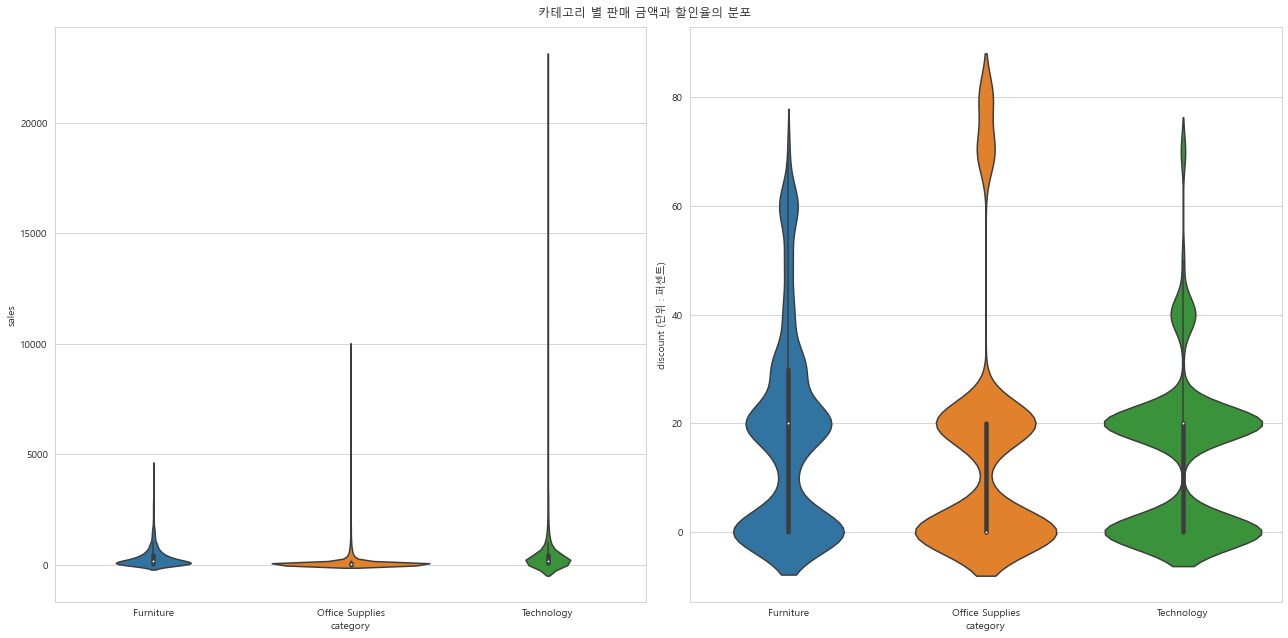

In [32]:
# violin plot으로 카테고리 별 판매 금액과 할인율의 분포를 확인하기.
# Error : module 'matplotlib' has no attribute 'subplots' >> import matplotlib.pyplot as plt로 불러와야 한다.
fig, ax=plt.subplots(1,2, figsize=(18,9))

_=sns.violinplot(data=df_copy, x="category", y="sales", ax=ax[0])
_=sns.violinplot(data=df_copy, x="category", y=df_copy["discount"]*100, ax=ax[1]) # discount * 100 = 할인률(%)
_=ax[1].set_ylabel("discount (단위 : 퍼센트)")
_=plt.suptitle("카테고리 별 판매 금액과 할인율의 분포")
_=plt.tight_layout()

plt.savefig("./../images_Superstore/카테고리 별 판매 금액과 할인율의 분포.png", dpi=200, facecolor="#E9ECF0")

funiture는 0 근처에 많이 분포되어 있다. funiture는 5000 미만의 판매가를 가지고, office supplies는 10000 미만의 판매가를, technology는 20000 이상의 판매가를 가지고 있다. funiture는 0%, 20% 에서 할인율이 많이 분포되어 있고, 40% ~ 60% 도 분포되어 있다. office supplies는 0%, 20% 에서 많이 분포되어 있고, 60% ~ 80% 좀 넘데 할인율이 분포되어 있다. technology도 0%, 20% 에서 할인율이 많이 분포되어 있고, 40% 에도 좀 분포되어 있다.

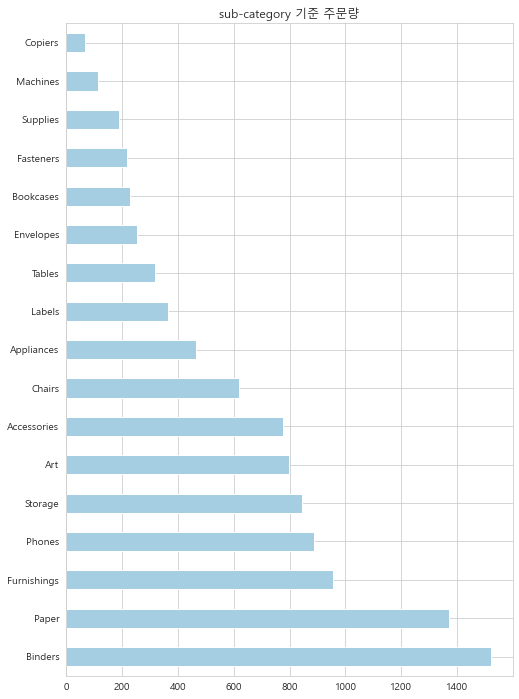

In [33]:
# sub-category 기준으로 어떤 것이 가장 주문량이 많은가? 비율은?
fig, ax=plt.subplots(1,1, figsize=(8,12))

_=df_copy["sub-category"].value_counts().plot.barh(ax=ax, cmap='Paired')
_=plt.title("sub-category 기준 주문량")

plt.savefig("./../images_Superstore/sub-category 기준 주문량.png", dpi=200, facecolor="#E9ECF0")

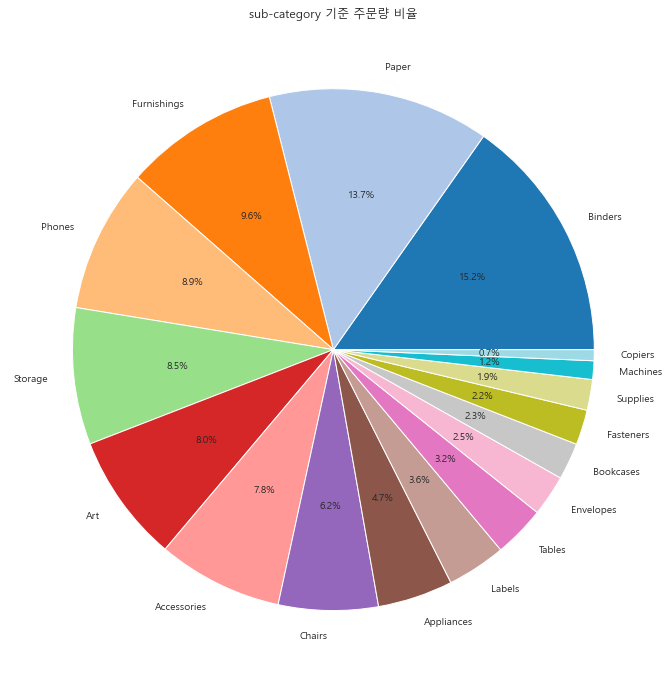

In [34]:
_=df_copy["sub-category"].value_counts().plot.pie(autopct="%.1f%%", figsize=(12,12), cmap="tab20")
_=plt.ylabel("")
_=plt.title("sub-category 기준 주문량 비율")

plt.savefig("./../images_Superstore/sub-category 기준 주문량 비율.png", dpi=200, facecolor="#E9ECF0")

Binders가 가장 많고, 그 다음은 Paper가 많다. 그리고 Machines와 Copiers가 가장 적다. 종이류와 사무 용품이 많이 나가고, 기계가 덜 나가는 것 같다.

## 4-2. 주 별 주문량 확인하기.

In [35]:
df_copy.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales,quantity,discount,profit,order year,order month,order day,order dayname,ship year,ship month,ship day,ship dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday,2016,11,11,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday,2016,11,11,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday,2016,6,16,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday,2015,10,18,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday,2015,10,18,Sunday


In [36]:
# 주문량이 많은 도시 top 10
df_copy["city"].value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: city, dtype: int64

In [37]:
df_copy["city"].value_counts().nlargest(10) # nlargest : 숫자가 큰 것 골라오기.

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: city, dtype: int64

뉴욕이 가장 주문량이 많고, 스프링 필드가 10위를 차지하고 있다.

In [38]:
df_copy["state"].sort_values().drop_duplicates().values # 알파벳 순서로 인덱스 만들어주기.

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

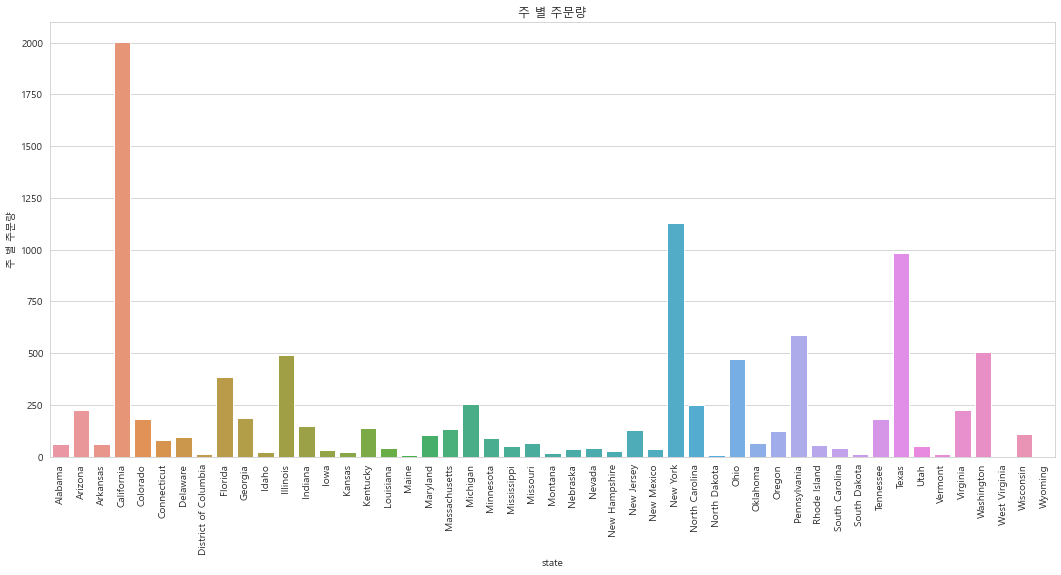

In [39]:
# 주문량이 많은 도시를 그래프로 그려보자.
fig, ax=plt.subplots(1,1, figsize=(18,8))

_=sns.countplot(data=df_copy, x="state", order=df_copy["state"].sort_values().drop_duplicates().values)
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_=ax.set_ylabel("주 별 주문량")
_=plt.title("주 별 주문량")

plt.savefig("./../images_Superstore/주 별 주문량.png", dpi=200, facecolor="#E9ECF0")

캘리포니아에서 가장 주문량이 많았고, 그 다음은 뉴욕 그리고 텍사스이다.

## 4-3. 세그먼트 별 / 지역 별 주문량

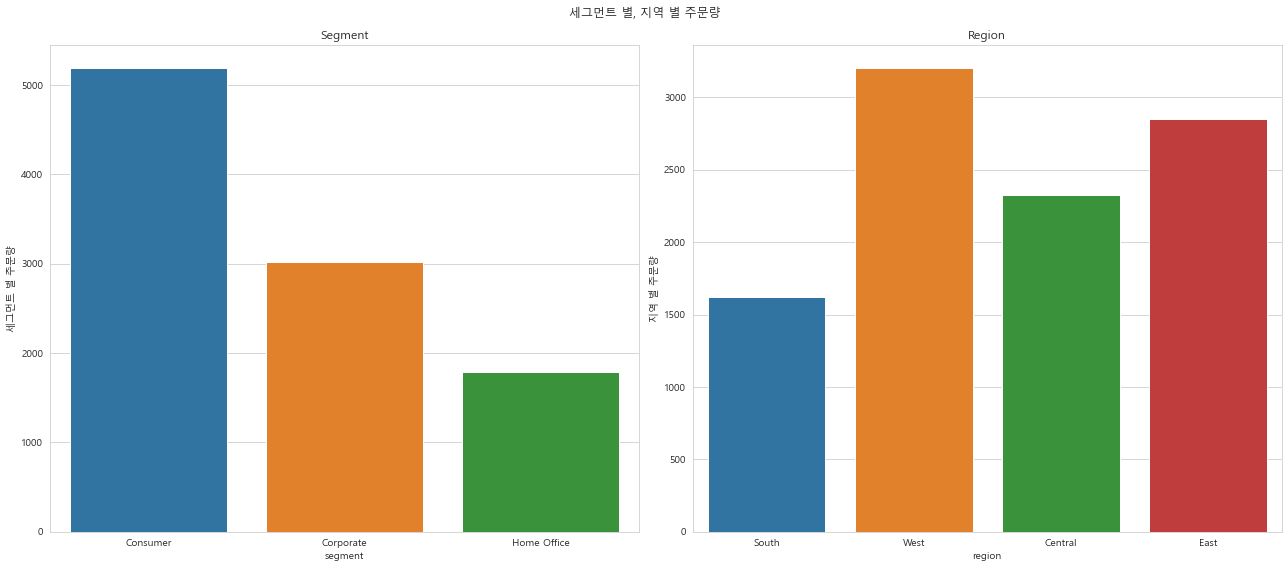

In [40]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))

_=sns.countplot(data=df_copy, x="segment", ax=ax[0])
_=ax[0].set_title("Segment")
_=ax[0].set_ylabel("세그먼트 별 주문량")
_=sns.countplot(data=df_copy, x="region", ax=ax[1])
_=ax[1].set_ylabel("지역 별 주문량")
_=ax[1].set_title("Region")
_=plt.suptitle("세그먼트 별, 지역 별 주문량")
plt.tight_layout()

plt.savefig("./../images_Superstore/세그먼트 별, 지역 별 주문량.png", dpi=200, facecolor="#E9ECF0")

customer 목적인 경우가 가장 많았고, 그리고 home office 목적인 경우가 가장 적었다. (Customer > Corporate > Home Office) 그리고 west에서 가장 주문량이 많고, south에서 가장 주문량이 적었다. (West > East > Central > South)

## 4-4. 할인율에 따른 마진

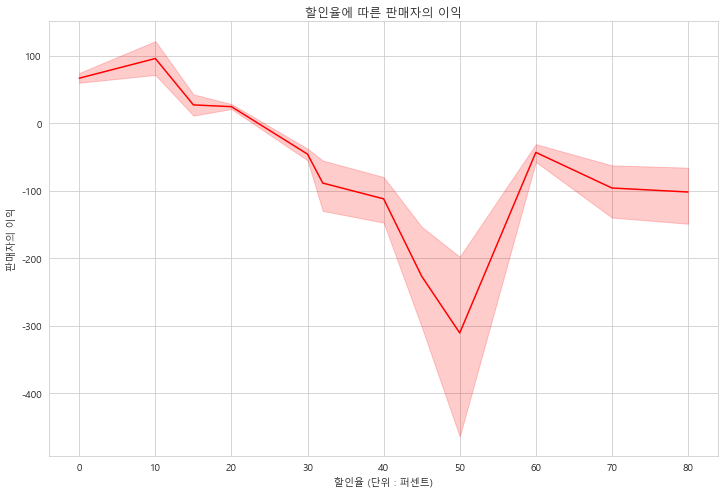

In [41]:
# 할인을 많이 하면, 당연히 파는 사람의 마진이 줄 것이다.
# 정말 이 자료에서도 이렇게 되는지 파악해보기.

fig, ax=plt.subplots(1,1,figsize=(12,8))

_=sns.lineplot(data=df_copy, x=df_copy["discount"]*100, y="profit", color="red") # 추정 회귀선
_=ax.set_xlabel("할인율 (단위 : 퍼센트)")
_=ax.set_ylabel("판매자의 이익")
_=plt.title("할인율에 따른 판매자의 이익")

# 면적은 데이터의 신뢰구간을 나타낸다. 좁을수록 오차의 범위가 줄어든다.
plt.savefig("./../images_Superstore/할인율에 따른 판매자의 이익.png", dpi=200, facecolor="#E9ECF0")

0% ~ 50% 까지는 내가 예상한 대로 판매자의 이익이 줄고 있다. 하지만 50% ~ 60% 에서는 판매자의 이익이 증가한 것을 알 수 있다. 왜 그럴까? (어떤 상품 때문에, 이익이 변화하는 것일까?) 
**[TIP] 구매 데이터가 있는 경우에, lineplot을 잘 이용하면 회귀 추정선을 그려서 인사이트를 도출해낼 수 있다.**

## 4-5. 상관 관계 Heatmap 그리기.

In [42]:
df_copy.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales,quantity,discount,profit,order year,order month,order day,order dayname,ship year,ship month,ship day,ship dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday,2016,11,11,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday,2016,11,11,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday,2016,6,16,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday,2015,10,18,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday,2015,10,18,Sunday


In [43]:
# 상관 관계 표현하기. 수치형 변수를 모두 상관 계수로 표현하기.
corr=df_copy[["sales", "quantity", "discount", "profit"]].corr()
corr

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


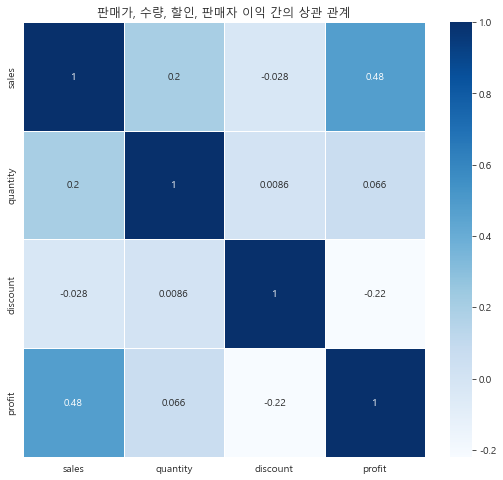

In [44]:
fig, ax=plt.subplots(1,1, figsize=(9,8))

_=sns.heatmap(corr, cbar=True, linewidths=0.5, annot=True, cmap="Blues", ax=ax)
_=plt.title("판매가, 수량, 할인, 판매자 이익 간의 상관 관계")

plt.savefig("./../images_Superstore/판매가, 수량, 할인, 판매자 이익 간의 상관 관계.png", dpi=200, facecolor="#E9ECF0")

* 판매가가 높을 수록 마진이 높다. (당연한 사실) - 정비례 관계
* 할인율이 높을 수록 마진은 적다. - 반비례 관계

## 4-6. 판매 금액에 따른 상위 10개 품목

In [45]:
df_copy.head()

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,sales,quantity,discount,profit,order year,order month,order day,order dayname,ship year,ship month,ship day,ship dayname
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday,2016,11,11,Friday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday,2016,11,11,Friday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday,2016,6,16,Thursday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday,2015,10,18,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday,2015,10,18,Sunday


In [46]:
prod_top10=df_copy.groupby(["product name"]).sum().sort_values("sales", ascending=False).head(10)
prod_top10

,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
product name,,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04,10083,39,87,10083,39,107
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03,20157,68,180,20157,70,161
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03,2014,3,18,2014,3,23
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,5.684342e-14,16124,49,134,16124,49,159
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03,22172,101,136,22172,101,189
GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02,18141,75,140,18141,76,143
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03,16129,56,130,16129,57,113
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4.094977e+03,6044,23,35,6044,23,49
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03,12094,37,87,12094,37,110


In [47]:
prod_top10.reset_index(inplace=True)
prod_top10 # 새로운 데이터 프레임으로 만들어주기.

,product name,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04,10083,39,87,10083,39,107
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,61859,27453.384,31,2.4,7.753039e+03,20157,68,180,20157,70,161
2,Cisco TelePresence System EX90 Videoconferenci...,2698,22638.480,6,0.5,-1.811078e+03,2014,3,18,2014,3,23
3,HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,5.684342e-14,16124,49,134,16124,49,159
4,GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03,22172,101,136,22172,101,189
5,GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02,18141,75,140,18141,76,143
6,Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03,16129,56,130,16129,57,113
7,HP Designjet T520 Inkjet Large Format Printer ...,19245,18374.895,12,0.5,4.094977e+03,6044,23,35,6044,23,49
8,GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03,12094,37,87,12094,37,110
9,High Speed Automatic Electric Letter Opener,13590,17030.312,11,0.2,-2.620048e+02,6046,13,41,6046,13,50


In [48]:
explode=[]

for ii in range(1, prod_top10["sales"].nunique()+1):
    explode.append(0.02)
    
print(explode)

[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


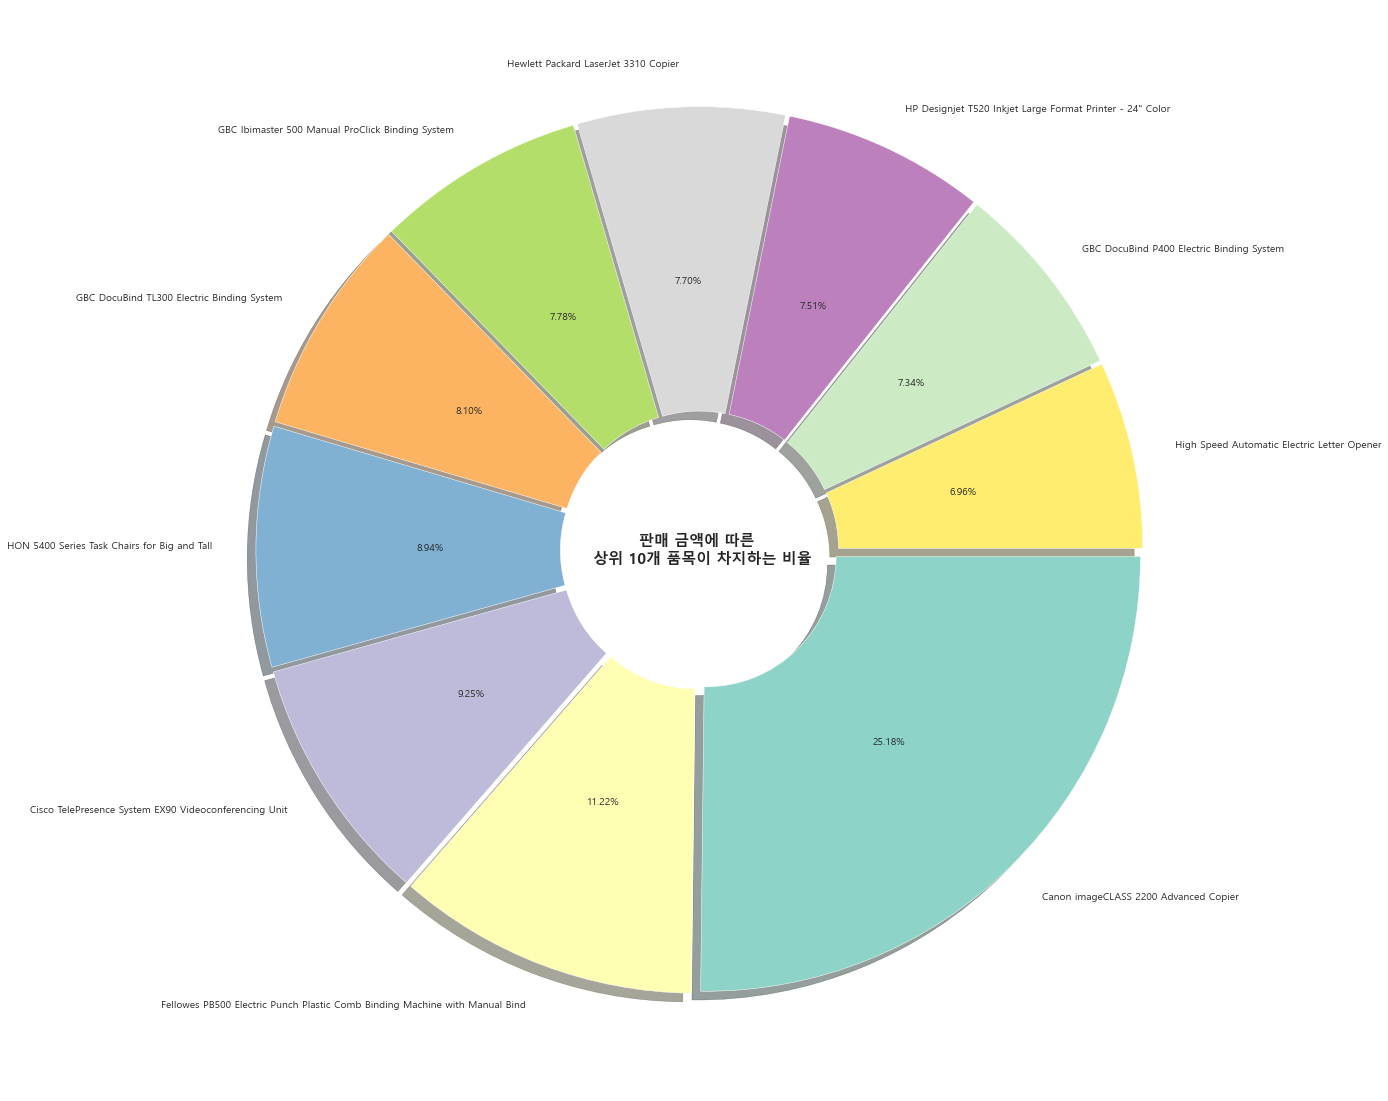

In [49]:
wedgeprops={"width":0.7, "edgecolor":"white", "linewidth":0.5}
_=prod_top10["sales"].plot.pie(labels=prod_top10["product name"], autopct="%.2f%%", figsize=(20,20), 
                               wedgeprops=wedgeprops, explode=explode, shadow=True, cmap="Set3", counterclock=False)
_=plt.ylabel("")

# 이 방식 대신에 흰색 원을 덧 붙이는 방식을 사용해도 좋다.

"""
center_circle=plt.Circle((0,0), 0.5, fc="white") # 흰색 원을 (0,0) 기준으로 그려주기.
fig=plt.gcf() # 기존의 그림과 지금 그리는 그림의 중심을 맞춰주기.
fig.gca().add_artist(center_circle) # 그래프를 그려준다.

"""
_=plt.annotate(xy=(0,0), text="판매 금액에 따른 \n 상위 10개 품목이 차지하는 비율", ha="center", va="center", fontweight="bold", fontsize=15)
# annotate를 이용해서 원 안에 글씨 넣어주기. 그리고 \n 이용해서 띄어쓰기도 해주기.
plt.savefig("./../images_Superstore/판매 금액에 따른 상위 10개 품목이 차지하는 비율.png", dpi=200, facecolor="#E9ECF0")

## 4-7. 주 별 총 판매 금액을 지도 위에 반응형으로 나타내기.

In [70]:
sales=df_copy.groupby(["state"]).sum().sort_values("sales", ascending=False).reset_index()
sales

,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
1,New York,5452096,310876.2710,4224,62.40,74038.5486,2273750,9065,16761,2273764,9015,17744
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563,1985440,7479,14834,1985462,7304,15976
3,Washington,2584458,138641.2700,1883,32.40,33402.6517,1020048,3988,7519,1020051,4005,7909
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,1183222,4484,8991,1183227,4500,8955
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017,771997,2880,5937,772000,2884,6230
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870,991740,3689,7999,991748,3670,7665
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766,945396,3695,7462,945401,3668,8081
8,Michigan,1200167,76269.6140,946,1.80,24463.1876,513982,2084,3922,513989,2039,3771
9,Virginia,1218137,70636.7200,893,0.00,18597.9504,451437,1541,3297,451437,1557,3664


In [71]:
# 워싱턴 D.C (District of Columbia) 는 제거시켜주기.
# 행을 drop을 이용해서 삭제시키는 경우에는, index를 이용해주기.
dc=sales.loc[sales["state"]=="District of Columbia", :].index
sales=sales.drop(dc)
sales

,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
1,New York,5452096,310876.2710,4224,62.40,74038.5486,2273750,9065,16761,2273764,9015,17744
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563,1985440,7479,14834,1985462,7304,15976
3,Washington,2584458,138641.2700,1883,32.40,33402.6517,1020048,3988,7519,1020051,4005,7909
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,1183222,4484,8991,1183227,4500,8955
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017,771997,2880,5937,772000,2884,6230
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870,991740,3689,7999,991748,3670,7665
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766,945396,3695,7462,945401,3668,8081
8,Michigan,1200167,76269.6140,946,1.80,24463.1876,513982,2084,3922,513989,2039,3771
9,Virginia,1218137,70636.7200,893,0.00,18597.9504,451437,1541,3297,451437,1557,3664


In [72]:
# 각각의 주 당 어떤 코드랑 연결되는지 적어주기.
# 마지막에 지도와 데이터를 매핑시킬 예정이다. 그 과정에서 state_code가 필요하다.
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [73]:
state_cd=pd.DataFrame(state, state_code)
state_cd

,0
AL,Alabama
AZ,Arizona
AR,Arkansas
CA,California
CO,Colorado
CT,Connecticut
DE,Delaware
FL,Florida
GA,Georgia
ID,Idaho


In [74]:
state_cd.reset_index(inplace=True)
state_cd

,index,0
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado
5,CT,Connecticut
6,DE,Delaware
7,FL,Florida
8,GA,Georgia
9,ID,Idaho


In [75]:
state_cd.columns=["state_cd", "state"]
state_cd

,state_cd,state
0,AL,Alabama
1,AZ,Arizona
2,AR,Arkansas
3,CA,California
4,CO,Colorado
5,CT,Connecticut
6,DE,Delaware
7,FL,Florida
8,GA,Georgia
9,ID,Idaho


In [77]:
sales.head()

,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
1,New York,5452096,310876.2710,4224,62.40,74038.5486,2273750,9065,16761,2273764,9015,17744
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563,1985440,7479,14834,1985462,7304,15976
3,Washington,2584458,138641.2700,1883,32.40,33402.6517,1020048,3988,7519,1020051,4005,7909
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603,1183222,4484,8991,1183227,4500,8955


In [78]:
sales=sales.sort_values("state", ascending=True).reset_index()
sales

,index,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,26,Alabama,243876,19510.6400,256,0.00,5786.8253,122953,477,1136,122955,461,1143
1,15,Arizona,1019876,35282.0010,862,68.00,-3427.9246,451495,1798,3655,451501,1746,3954
2,30,Arkansas,304575,11678.1300,240,0.00,4008.6871,120941,463,857,120941,464,1075
3,0,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
4,17,Colorado,797002,32108.1180,693,57.60,-6527.8579,366875,1586,2840,366877,1590,2657
5,29,Connecticut,444411,13384.3570,281,0.60,3511.4918,165305,580,1301,165305,594,1173
6,21,Delaware,504370,27451.0690,367,0.60,9977.3748,193482,712,1371,193482,722,1473
7,5,Florida,1958255,89473.7080,1379,114.65,-3399.3017,771997,2880,5937,772000,2884,6230
8,12,Georgia,883590,49095.8400,705,0.00,16250.0433,370908,1227,2985,370908,1246,3111
9,41,Idaho,129427,4382.4860,64,1.80,826.7231,42331,172,320,42331,172,397


In [79]:
sales.insert(1, "state_cd", state_cd["state_cd"]) # 칼럼 1에 state_cd 라는 칼럼명을 가진 칼럼을 넣어주기.
sales

,index,state_cd,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,26,AL,Alabama,243876,19510.6400,256,0.00,5786.8253,122953,477,1136,122955,461,1143
1,15,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246,451495,1798,3655,451501,1746,3954
2,30,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871,120941,463,857,120941,464,1075
3,0,CA,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
4,17,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579,366875,1586,2840,366877,1590,2657
5,29,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918,165305,580,1301,165305,594,1173
6,21,DE,Delaware,504370,27451.0690,367,0.60,9977.3748,193482,712,1371,193482,722,1473
7,5,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017,771997,2880,5937,772000,2884,6230
8,12,GA,Georgia,883590,49095.8400,705,0.00,16250.0433,370908,1227,2985,370908,1246,3111
9,41,ID,Idaho,129427,4382.4860,64,1.80,826.7231,42331,172,320,42331,172,397


In [80]:
# drop으로 열 삭제하는 경우에는 열 이름 + axis=1 처리해주기.
sales.drop(["index"], axis=1, inplace=True)

In [81]:
sales

,state_cd,state,row id,sales,quantity,discount,profit,order year,order month,order day,ship year,ship month,ship day
0,AL,Alabama,243876,19510.6400,256,0.00,5786.8253,122953,477,1136,122955,461,1143
1,AZ,Arizona,1019876,35282.0010,862,68.00,-3427.9246,451495,1798,3655,451501,1746,3954
2,AR,Arkansas,304575,11678.1300,240,0.00,4008.6871,120941,463,857,120941,464,1075
3,CA,California,10137449,457687.6315,7667,145.60,76381.3871,4033452,15902,31666,4033481,15784,32378
4,CO,Colorado,797002,32108.1180,693,57.60,-6527.8579,366875,1586,2840,366877,1590,2657
5,CT,Connecticut,444411,13384.3570,281,0.60,3511.4918,165305,580,1301,165305,594,1173
6,DE,Delaware,504370,27451.0690,367,0.60,9977.3748,193482,712,1371,193482,722,1473
7,FL,Florida,1958255,89473.7080,1379,114.65,-3399.3017,771997,2880,5937,772000,2884,6230
8,GA,Georgia,883590,49095.8400,705,0.00,16250.0433,370908,1227,2985,370908,1246,3111
9,ID,Idaho,129427,4382.4860,64,1.80,826.7231,42331,172,320,42331,172,397


In [156]:
# plotly를 이용해서 반응형 그래프를 그려보기.
import plotly.express as px
import plotly
import kaleido
print(kaleido.__version__)

0.2.1


In [162]:
# 주의 : locations는 "두글자로 된 약어" 만 가능하다.
# 참고 공식 문서 : https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e
fig=px.choropleth(locations=sales["state_cd"], color=sales["sales"], locationmode="USA-states", scope="usa"
                  , color_continuous_scale="pinkyl", title="주 별 총 판매 금액")
fig.show()

# save image : 계속 저장이 안되고 있다.
# ValueError: Image export using the "kaleido" engine requires the kaleido package,which can be installed using pip: pip install -U kaleido
# 계속 설치해봐도 소용이 없다..
# fig.write_image("주 별 총 판매 금액.png", engine="kaleido")

## 4-8. 워드 클라우드 이용하여, 상품 이름과 중분류의 빈도를 살펴보기.

상품 이름에서는 "어떤 단어가 많이 나왔는지" 보여주고 있다.

In [85]:
df_copy.describe(include="object")

,order id,ship mode,customer id,customer name,segment,country,city,state,region,product id,category,sub-category,product name,order dayname,ship dayname
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850,7,7
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,Monday,Wednesday
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48,1871,1593


In [87]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [103]:
type(df_copy["product name"]) # string이 아니라서 밑에서 오류가 났었다. string으로 변형시켜주기.

pandas.core.series.Series

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

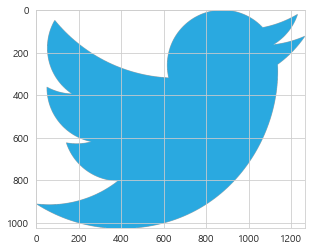

In [275]:
# 참고 블로그 : https://noanswercode.tistory.com/8
icon = Image.open('./../images_Superstore/twitter.png').convert("RGBA") # 마스크가 될 이미지 불러오기, 꼭 이 format 지켜주기.
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255)) # 흰색으로 만들어주기.
mask.paste(icon,icon) # 그 위에 icon 올려주기.
mask = np.array(mask) # 이미지 to array
mask

In [276]:
df_copy.groupby(["product name"]).size().sort_values(ascending=False)

product name
Staple envelope                                                              48
Staples                                                                      46
Easy-staple paper                                                            46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Xerox 1922                                                                    1
4009 Highlighters                                                             1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection     1
Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner                    1
Cisco SPA 501G IP Phone                                                       1
Length: 1850, dtype: int64

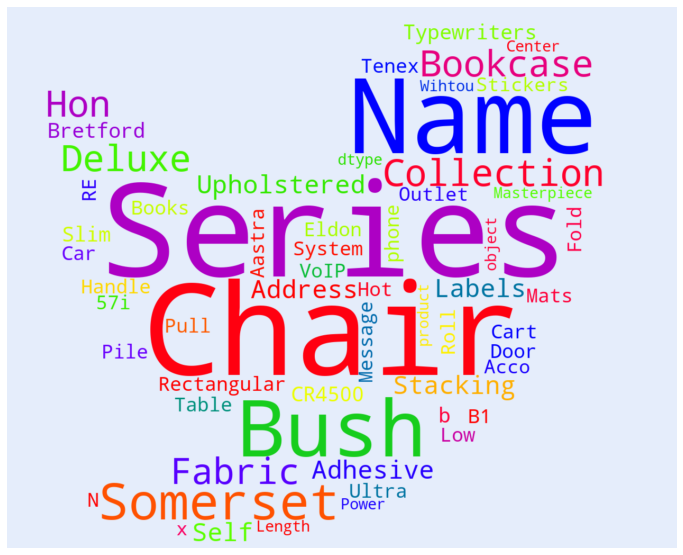

In [277]:
# start product name review
plt.figure(figsize=(12,12))
text=str(df_copy["product name"])

# create and generate a word cloud image 
wordcloud=WordCloud(background_color="#E5EDFB", mask=mask, colormap="prism", width=1000, height=1000).generate(text)

# display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save figure
_=wordcloud.to_file("./../images_Superstore/product name wordcloud.png")

상품 이름에서는 Series와 Chair, Name가 많이 등장했음을 알 수 있다. (단어의 크기는 상품 이름 빈도수와 비례한다.)

In [278]:
type(df_copy["sub-category"]) # string이 아니라서 밑에서 오류가 났었다. string으로 변형시켜주기.

pandas.core.series.Series

In [279]:
df_copy.groupby(["sub-category"]).size().sort_values(ascending=False)

sub-category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
dtype: int64

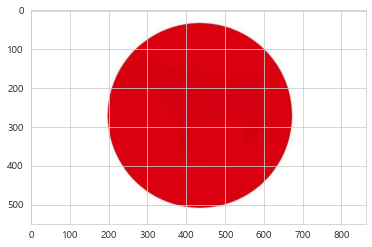

In [280]:
img=Image.open("./../images_Superstore/circle.jpg").convert("RGBA") # 마스크가 될 이미지 불러오기, 꼭 이 format 지켜주기.
plt.imshow(img)

In [281]:
mask=Image.new("RGB", img.size, (255,255,255))
mask.paste(img)
mask
mask=np.array(mask)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

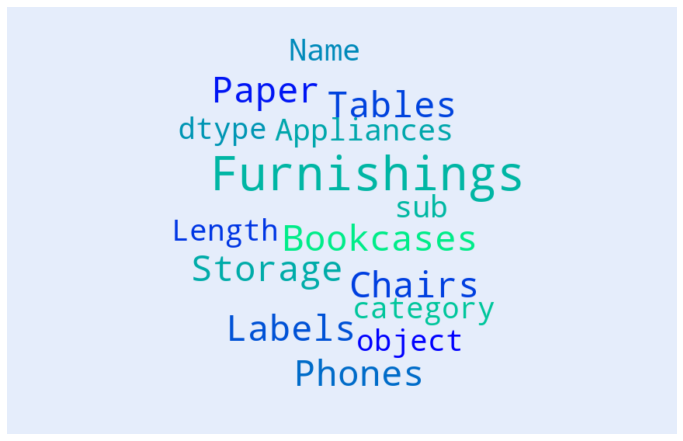

In [283]:
# start sub-category review
plt.figure(figsize=(12,12))
text=str(df_copy["sub-category"])

# create and generate a word cloud image 
wordcloud=WordCloud(background_color="#E5EDFB", colormap="winter", mask=mask).generate(text)

# display the generated image
plt.imshow(wordcloud, interpolation="bilinear") # interpolation="bilinear" : 이미지를 부드럽게 보여주기.
plt.axis("off")
plt.show()

# save figure
_=wordcloud.to_file("./../images_Superstore/sub-category wordcloud.png")

중분류에서는 가구, 테이블, 책꽂이 등등 가구에 관련된 단어가 많은 느낌이 많이 든다.